## Feature scaling of numerical data

## Linear Transformation

In [ ]:
import timeit # To measure the time of our models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

because X has a shape of (442,10) and we only need one column, we want to reshape it to (442,1).

with raw = X[:,None,2]

: selects all the columns and rows
None tells that there's no transformation of the array (newaxis)
2 select the third column of x (remember we start at 0)

https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis

Details of the dataset https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [ ]:
# Scaling rules
max_raw = max(raw)
min_raw = min(raw)

scaled = (2*raw - max_raw - min_raw) / (max_raw - min_raw)

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

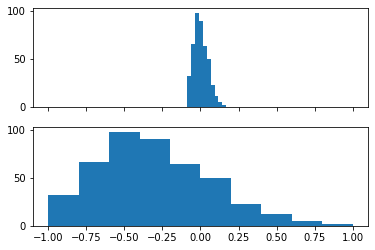

In [ ]:
fig, axs = plt.subplots(2, 1, sharex= True)

axs[0].hist(raw)
axs[1].hist(scaled)

In [ ]:
# training models
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [ ]:
raw_time = timeit.timeit(train_raw, number=100)
scaled_time = timeit.timeit(train_scaled, number=100)

print(f'The time to train the raw data is {raw_time}')
print(f'The time to train the scaled data is {scaled_time}')

The time to train the raw data is 0.0656389069999932
The time to train the scaled data is 0.0426139740002327


As we can see, the scaled data is faster than the raw data, so scaling is good for larger datasets

In [ ]:
# Normalizing with z

max-min: is better for uniformly distributed data

z-score scaling: it's better for normally distributed data (Gauss shaped)

## Non-linear data

In [ ]:
df = pd.read_csv('cars.csv')

<AxesSubplot:>

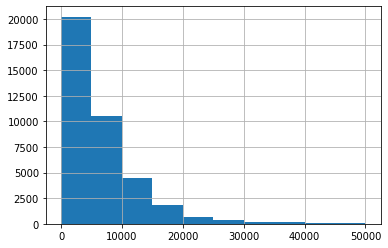

In [ ]:
df.price_usd.hist()

Our data is heavy biased

Using $tanh(x)$

<AxesSubplot:>

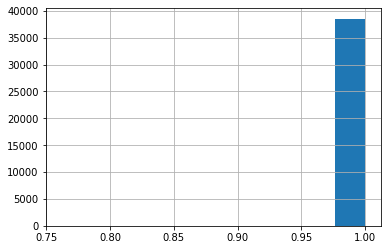

In [ ]:
df.price_usd.apply(lambda x: np.tanh(x)).hist()

all the data was collapsed in 1 limit

but in the formula of tanh(x/p) we can change p to be better fitted to the data

<AxesSubplot:>

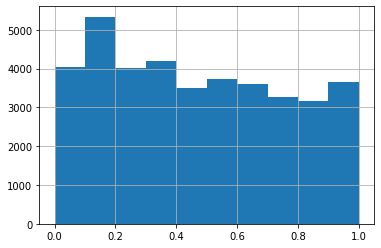

In [ ]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

now the data is better fitted

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=708ebb00-062b-4a54-8b2b-5517499dc119' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>